## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [1]:
# TODO - your code!

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
# reading in data

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

# read in column names.
column_names = [
'party',
'handicapped-infants',
'water-project-cost-sharing',
'adoption-of-the-budget-resolution',
'physician-fee-freeze',
'el-salvador-aid',
'religious-groups-in-schools',
'anti-satellite-test-ban',
'aid-to-nicaraguan-contras',
'mx-missile',
'immigration',
'synfuels-corporation-cutback',
'education-spending',
'superfund-right-to-sue',
'crime',
'duty-free-exports',
'export-administration-act-south-africa',
]
 
# read data in with correct format
voting_record = pd.read_csv(url, header=None, names=column_names, na_values='?')

# check data
voting_record.head(2)

party  ... export-administration-act-south-africa
0  republican  ...                                      y
1  republican  ...                                    NaN

[2 rows x 17 columns]

In [62]:
# convert values to numeric.
voting_record = voting_record.replace({'y':1,'n':0})

# check conversion
voting_record.sample(2)

party  ...  export-administration-act-south-africa
105  democrat  ...                                     1.0
178  democrat  ...                                     NaN

[2 rows x 17 columns]



---
I thought it made sense to check the voting of one party. after further assesment of the data the graph turned out odd. scrapped the idea and used the entire data set.


In [18]:
rep = voting_record[voting_record['party']=='republican']

rep.shape

(168, 17)

In [19]:
dem = voting_record[voting_record['party']=='democrat']

dem.shape

(267, 17)

In [24]:
rep['handicapped-infants'].isnull().sum()

3



---



In [0]:
no_nan_hand = voting_record['handicapped-infants'].dropna(axis=0)

In [63]:
rep_hand.value_counts(dropna=False)

0.0    134
1.0     31
Name: handicapped-infants, dtype: int64

In [0]:
# creat a function to generate confidence interval
def confidence_interval(data, confidence=0.95):
    '''
    Calculate a confidence interval around a sample mean for given data. 
    using t-distribution and two tailed test, default 95% confidence.

    argument:
    data - iterable (list or np.array) of sample observations
    confidence - level of confidence for the interval.

    returns: 
    tuple of (mean, lower bound, upperbond)
    '''
    data = np.array(data)
    mean =np.mean(data)
    n = len(data)
    stderr = np.std(data, ddof=1)/np.sqrt(n)
    moe = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
    return (mean, mean - moe, mean + moe)

In [0]:
conf_int = stats.t.interval(0.95
                            # sample size(len of sample shape[0]),
                            #mean of sample,
                            #std error of  mean (stats.sem(df)) 
                            )    

In [176]:
conf_int = stats.t.interval(.95, #alpha
                            voting_record.shape[0], #sample size
                            loc = no_nan_hand.mean(), #mean
                            scale = stats.sem(no_nan_hand), # std err
                            )
print(no_nan_hand.mean())
conf_int

0.44208037825059104


(0.3945645472126659, 0.4895962092885162)

In [177]:
CI = confidence_interval(no_nan_hand)
CI

(0.44208037825059104, 0.39456046308364673, 0.48960029341753536)

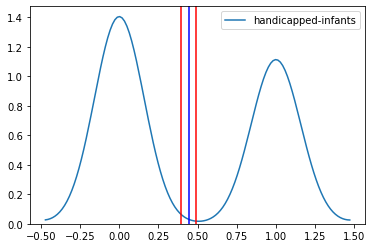

In [189]:
sns.kdeplot(no_nan_hand)
CI = confidence_interval(no_nan_hand)

colors =['blue', 'red', 'red']
for i in range(0,3):
    plt.axvline(x=CI[i], color=colors[i])

the confidence level is telling us that if we sampled all members of the house of representative an infinite number of times, we would expect the average votes to support handicapped infants to lie within [0.395, 0.490] 95% of the time.



---



In [0]:
# read in data set
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")

In [191]:
# look at cat columns.
df.describe(exclude='number')

workclass education       marital-status  ...    sex         country  salary
count      30725     32561                32561  ...  32561           31978   32561
unique         8        16                    7  ...      2              41       2
top      Private   HS-grad   Married-civ-spouse  ...   Male   United-States   <=50K
freq       22696     10501                14976  ...  21790           29170   24720

[4 rows x 9 columns]

In [263]:
 # checking values 
print(df['race'].value_counts())
df['race'].isnull().sum

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64


0

In [265]:
 # checking values
print(df['education'].value_counts())
df['education'].isnull().sum()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64


0

In [251]:
# creating observed variable 

observed = pd.crosstab(df['race'], df['education'])
observed = np.array(observed)
observed

array([[  16,   14,    5,    4,    2,    9,    5,    8,   19,   21,    3,
         119,    5,    0,    2,   79],
       [  13,   21,    9,    5,   18,   11,    9,   29,   38,  289,   28,
         226,   88,    6,   41,  208],
       [ 133,  153,   70,   16,   21,   56,   89,  107,  112,  330,   11,
        1174,   86,    5,   15,  746],
       [   9,   10,   14,    9,   13,   17,    8,    8,    6,   33,    2,
          78,    7,    2,    4,   51],
       [ 762,  977,  335,  134,  279,  553,  403,  915, 1207, 4682,  369,
        8904, 1537,   38,  514, 6207]])

In [237]:
# creating crosstab with total for chi equation
contingency_table_sum = pd.crosstab(df['race'], df['education'], margins=True)
contingency_table_sum

education             10th   11th   12th  ...   Prof-school   Some-college    All
race                                      ...                                    
 Amer-Indian-Eskimo     16     14      5  ...             2             79    311
 Asian-Pac-Islander     13     21      9  ...            41            208   1039
 Black                 133    153     70  ...            15            746   3124
 Other                   9     10     14  ...             4             51    271
 White                 762    977    335  ...           514           6207  27816
All                    933   1175    433  ...           576           7291  32561

[6 rows x 17 columns]

In [258]:
#setting row sums
row_sum = contingency_table_sum.iloc[0:5,16]
row_sum

race
 Amer-Indian-Eskimo      311
 Asian-Pac-Islander     1039
 Black                  3124
 Other                   271
 White                 27816
Name: All, dtype: int64

In [239]:
#setting column sums
col_sum = contingency_table_sum.iloc[5,0:16]
col_sum

education
 10th              933
 11th             1175
 12th              433
 1st-4th           168
 5th-6th           333
 7th-8th           646
 9th               514
 Assoc-acdm       1067
 Assoc-voc        1382
 Bachelors        5355
 Doctorate         413
 HS-grad         10501
 Masters          1723
 Preschool          51
 Prof-school       576
 Some-college     7291
Name: All, dtype: int64

In [240]:
# setting total 
total = contingency_table.iloc[5,16]
total

32561

In [261]:
# creating the 'expected' variable. 
'''
1) crating the empty list for expected values
2) for the element in the range of the row sum (the number of rows)
3) creating an expected row list b/c its a numpy array [[]]
for the column in the col_sums
were going to multiply the column by the row sum[i] and divide it by the total
 - then add it to epected val to the expected row. 
 - then were going to add the expected row to the expected list.  
'''

expected = []
for i in range(len(row_sum)):
    expected_row = []
    for column in col_sum:
        expected_val = column*row_sum[i]/total
        expected_row.append(expected_val)
    expected.append(expected_row)

expected = np.array(expected)
print(expected)
print('\n')
print(expected.shape)

[[8.91136636e+00 1.12227819e+01 4.13571451e+00 1.60461902e+00
  3.18058413e+00 6.17014219e+00 4.90937011e+00 1.01912411e+01
  1.31999017e+01 5.11472314e+01 3.94468843e+00 1.00298240e+02
  1.64568963e+01 4.87116489e-01 5.50155094e+00 6.96385553e+01]
 [2.97714137e+01 3.74934738e+01 1.38167440e+01 5.36076902e+00
  1.06258100e+01 2.06134332e+01 1.64014004e+01 3.40472651e+01
  4.40987070e+01 1.70874512e+02 1.31785572e+01 3.35079973e+02
  5.49797918e+01 1.62737631e+00 1.83797795e+01 2.32650994e+02]
 [8.95148183e+01 1.12733024e+02 4.15433187e+01 1.61184239e+01
  3.19490188e+01 6.19791775e+01 4.93147016e+01 1.02371180e+02
  1.32593225e+02 5.13774761e+02 3.96244587e+01 1.00749744e+03
  1.65309788e+02 4.89309296e+00 5.52631676e+01 6.99520408e+02]
 [7.76520991e+00 9.77933724e+00 3.60378981e+00 1.39823715e+00
  2.77150579e+00 5.37655477e+00 4.27793987e+00 8.88047050e+00
  1.15021652e+01 4.45688093e+01 3.43733301e+00 8.73981450e+01
  1.43402537e+01 4.24464851e-01 4.79395596e+00 6.06818280e+01]
 [7.

In [245]:
observed_array.shape

(5, 16)

In [260]:
#calcualte the chi with the observed and expected
chi_squared = ((observed - expected)**2/(expected)).sum()

chi_squared

730.6712962254585

In [262]:
# find the degrees of freedom 
dof = (len(row_sum) - 1)*(len(col_sum) - 1)
dof

60

In [257]:
# one line chi squared with numpy.
chi_squared2, p_value, dof, expectect = stats.chi2_contingency(observed)
expectect

print(f'chi-squared: {chi_squared2}')
print('\n')
print(f'pvlaue: {p_value}')
print('\n')
print(f'Degrees of freedom: {dof}')
print('\n')
print('Expexted: \n', (np.array(expectect)))
print('\n')
print('Observed: \n', (observed))

chi-squared: 730.6712962254585


pvlaue: 5.547319569858429e-116


Degrees of freedom: 60


Expexted: 
 [[8.91136636e+00 1.12227819e+01 4.13571451e+00 1.60461902e+00
  3.18058413e+00 6.17014219e+00 4.90937011e+00 1.01912411e+01
  1.31999017e+01 5.11472314e+01 3.94468843e+00 1.00298240e+02
  1.64568963e+01 4.87116489e-01 5.50155094e+00 6.96385553e+01]
 [2.97714137e+01 3.74934738e+01 1.38167440e+01 5.36076902e+00
  1.06258100e+01 2.06134332e+01 1.64014004e+01 3.40472651e+01
  4.40987070e+01 1.70874512e+02 1.31785572e+01 3.35079973e+02
  5.49797918e+01 1.62737631e+00 1.83797795e+01 2.32650994e+02]
 [8.95148183e+01 1.12733024e+02 4.15433187e+01 1.61184239e+01
  3.19490188e+01 6.19791775e+01 4.93147016e+01 1.02371180e+02
  1.32593225e+02 5.13774761e+02 3.96244587e+01 1.00749744e+03
  1.65309788e+02 4.89309296e+00 5.52631676e+01 6.99520408e+02]
 [7.76520991e+00 9.77933724e+00 3.60378981e+00 1.39823715e+00
  2.77150579e+00 5.37655477e+00 4.27793987e+00 8.88047050e+00
  1.15021652e+01 4.4568809



---



# Did a chi squared with the voting records.

In [91]:
voting_record.isnull().sum()

party                                       0
handicapped-infants                        12
water-project-cost-sharing                 48
adoption-of-the-budget-resolution          11
physician-fee-freeze                       11
el-salvador-aid                            15
religious-groups-in-schools                11
anti-satellite-test-ban                    14
aid-to-nicaraguan-contras                  15
mx-missile                                 22
immigration                                 7
synfuels-corporation-cutback               21
education-spending                         31
superfund-right-to-sue                     25
crime                                      17
duty-free-exports                          28
export-administration-act-south-africa    104
dtype: int64

In [269]:
observed2 = pd.crosstab(voting_record['party'],
            voting_record['adoption-of-the-budget-resolution'])
observed2

adoption-of-the-budget-resolution  0.0  1.0
party                                      
democrat                            29  231
republican                         142   22

In [123]:
#cross tab for party vs adoption of the budget resolution
contingency_table2 = pd.crosstab(voting_record['party'],
                                voting_record['adoption-of-the-budget-resolution'], margins=True)
contingency_table2

adoption-of-the-budget-resolution  0.0  1.0  All
party                                           
democrat                            29  231  260
republican                         142   22  164
All                                171  253  424

In [131]:
dem_count = contingency_table2.iloc[0][:].values
print(dem_count)
rep_count = contingency_table2.iloc[1][:].values
print(rep_count)
total = contingency_table2.iloc[2][2]
print(total)

[ 29 231 260]
[142  22 164]
424


In [142]:
row_sum2 = contingency_table2.iloc[0:2,2]
col_sum2 = contingency_table2.iloc[2,0:2]

print(np.array(row_sum2))
print(np.array(col_sum2))

[260 164]
[171 253]


In [156]:
expected = []
for i in range(len(row_sum)):
    expected_row = []
    for column in col_sum:
        expected_val = column*row_sum[i]/total
        expected_row.append(expected_val)
    expected.append(expected_row)

expected = np.array(expected)
print(expected)

[[104.85849057 155.14150943]
 [ 66.14150943  97.85849057]]


In [270]:
observed2 = np.array(observed2)
observed2

array([[ 29, 231],
       [142,  22]])

In [154]:
expected

array([[104.85849057, 155.14150943],
       [ 66.14150943,  97.85849057]])

In [174]:
chi_squared = ((observed - expected)**2/(expected)).sum()
chi_squared


237.778255192867



---



In [271]:
chi_squared, p_value, dof, expectect2 = stats.chi2_contingency(observed2)
expectect

print(f'chi-squared: {chi_squared}')
print('\n')
print(f'pvlaue: {p_value}')
print('\n')
print(f'Degrees of freedom: {dof}')
print('\n')
print('Expexted: \n', (np.array(expectect)))
print('\n')
print('Observed: \n', (observed))

chi-squared: 234.65408769323486


pvlaue: 5.759792112623893e-53


Degrees of freedom: 1


Expexted: 
 [[8.91136636e+00 1.12227819e+01 4.13571451e+00 1.60461902e+00
  3.18058413e+00 6.17014219e+00 4.90937011e+00 1.01912411e+01
  1.31999017e+01 5.11472314e+01 3.94468843e+00 1.00298240e+02
  1.64568963e+01 4.87116489e-01 5.50155094e+00 6.96385553e+01]
 [2.97714137e+01 3.74934738e+01 1.38167440e+01 5.36076902e+00
  1.06258100e+01 2.06134332e+01 1.64014004e+01 3.40472651e+01
  4.40987070e+01 1.70874512e+02 1.31785572e+01 3.35079973e+02
  5.49797918e+01 1.62737631e+00 1.83797795e+01 2.32650994e+02]
 [8.95148183e+01 1.12733024e+02 4.15433187e+01 1.61184239e+01
  3.19490188e+01 6.19791775e+01 4.93147016e+01 1.02371180e+02
  1.32593225e+02 5.13774761e+02 3.96244587e+01 1.00749744e+03
  1.65309788e+02 4.89309296e+00 5.52631676e+01 6.99520408e+02]
 [7.76520991e+00 9.77933724e+00 3.60378981e+00 1.39823715e+00
  2.77150579e+00 5.37655477e+00 4.27793987e+00 8.88047050e+00
  1.15021652e+01 4.45688093

Based on a pvalue of 5.759792112623893e-53, that is every close to zero, i regect my null hypothesis that party affiliation and voting stance on adoption of the budget resolution are independed. i conclude that there is an association between party and their voting stance.

# Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)